In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data
data.columns
data.info()
data.isnull().sum()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1.	W - This indicates the number of Wins credited to a pitcher
2.	R - This indicates Runs scored. 
3.	AB - This means At bat or time at bat.
4.	H - This means Hit. 
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. 
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


<AxesSubplot:xlabel='R', ylabel='W'>

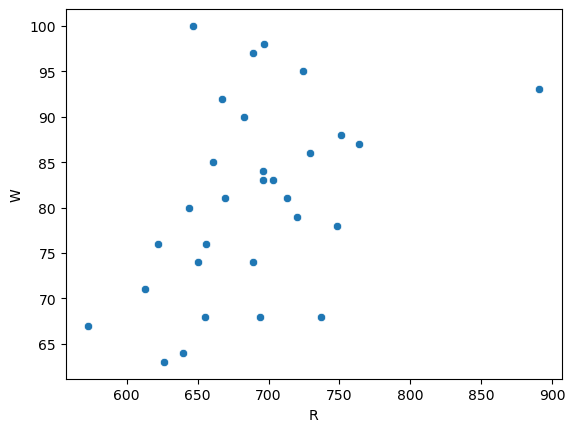

In [29]:
#EDA SCATTERPLOT
import seaborn as sns
sns.scatterplot(x="R",y="W",data=data)

<AxesSubplot:xlabel='AB', ylabel='W'>

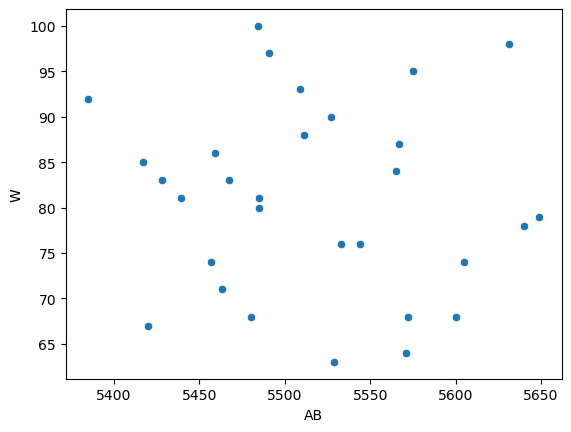

In [13]:
sns.scatterplot(x="AB",y="W",data=data)

<AxesSubplot:xlabel='H', ylabel='W'>

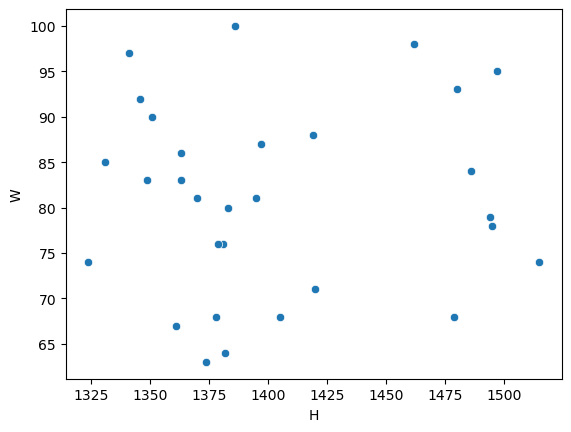

In [14]:
sns.scatterplot(x="H",y="W",data=data)

<AxesSubplot:xlabel='2B', ylabel='W'>

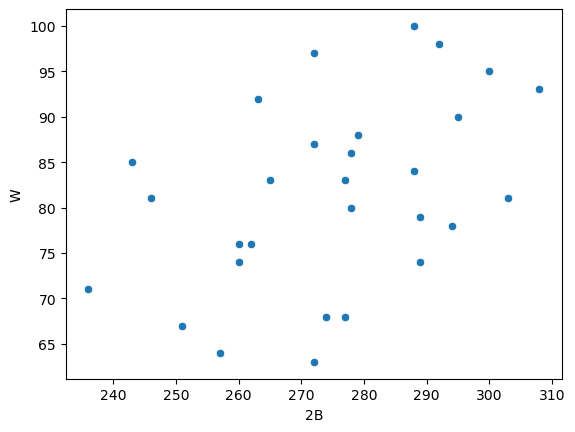

In [15]:
sns.scatterplot(x="2B",y="W",data=data)

<AxesSubplot:xlabel='H', ylabel='W'>

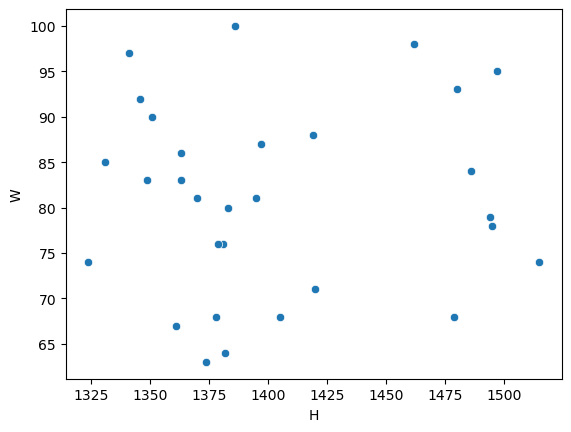

In [16]:
sns.scatterplot(x="H",y="W",data=data)

<AxesSubplot:xlabel='3B', ylabel='W'>

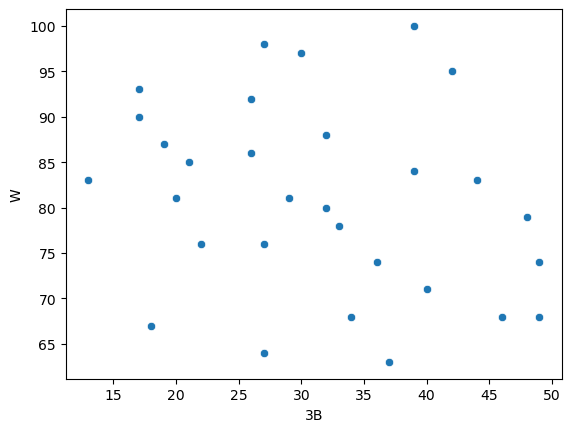

In [17]:
sns.scatterplot(x="3B",y="W",data=data)

<AxesSubplot:xlabel='HR', ylabel='W'>

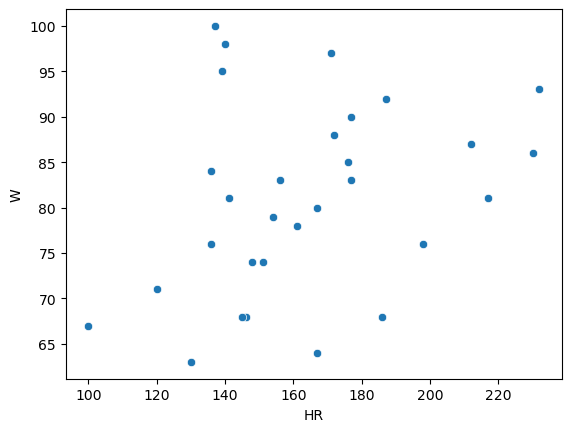

In [18]:
sns.scatterplot(x="HR",y="W",data=data)

<AxesSubplot:xlabel='BB', ylabel='W'>

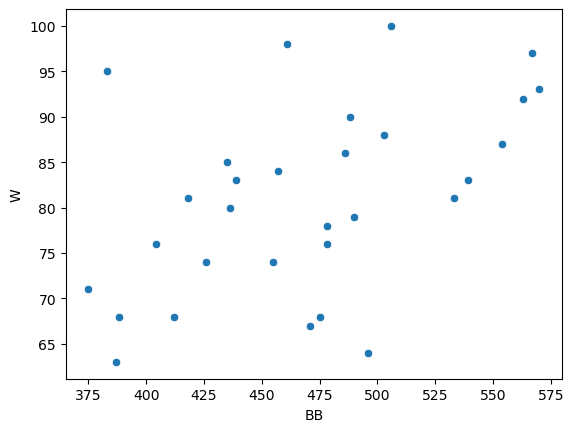

In [19]:
sns.scatterplot(x="BB",y="W",data=data)

<AxesSubplot:xlabel='SO', ylabel='W'>

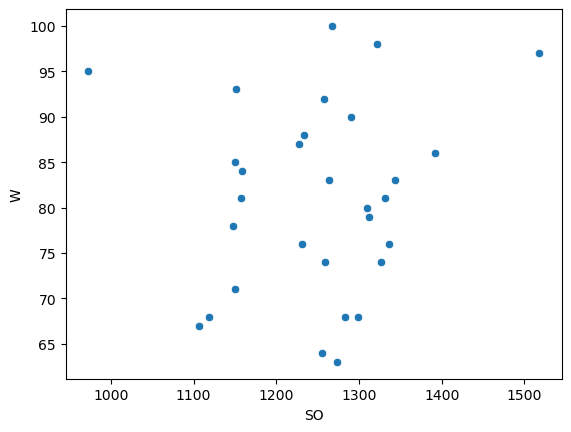

In [20]:
sns.scatterplot(x="SO",y="W",data=data)

<AxesSubplot:xlabel='SB', ylabel='W'>

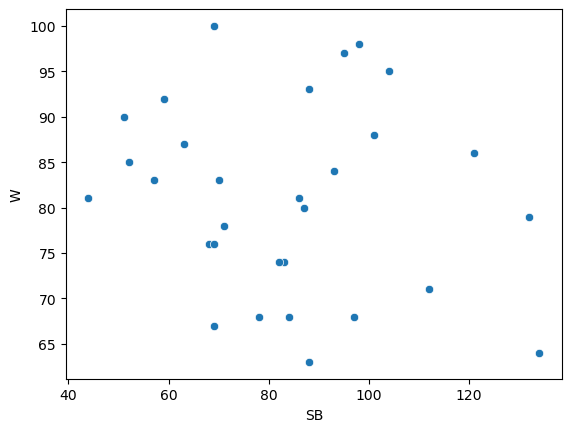

In [21]:
sns.scatterplot(x="SB",y="W",data=data)

<AxesSubplot:xlabel='RA', ylabel='W'>

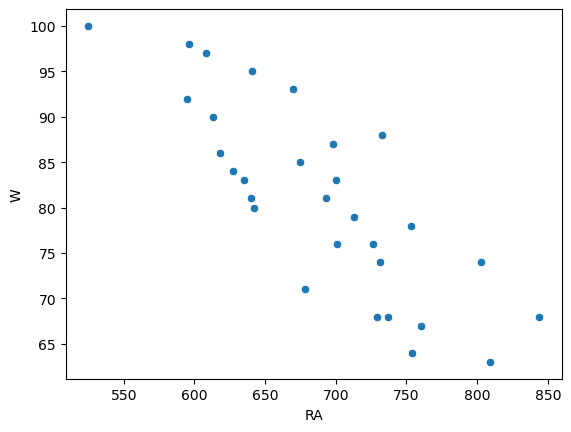

In [22]:
sns.scatterplot(x="RA",y="W",data=data)

<AxesSubplot:xlabel='ER', ylabel='W'>

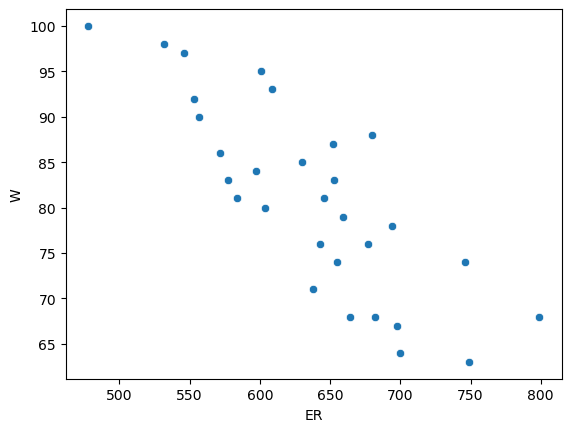

In [23]:
sns.scatterplot(x="ER",y="W",data=data)

<AxesSubplot:xlabel='ERA', ylabel='W'>

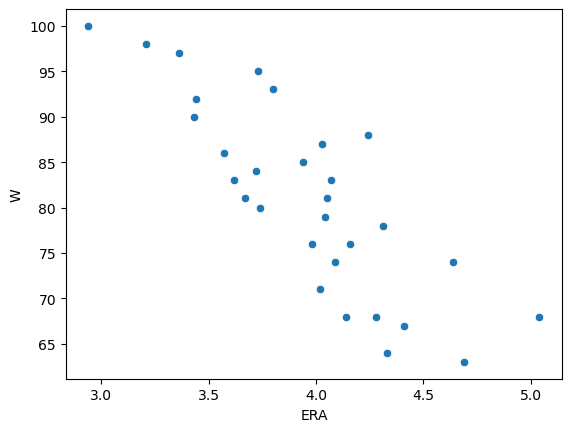

In [24]:
sns.scatterplot(x="ERA",y="W",data=data)

<AxesSubplot:xlabel='SHO', ylabel='W'>

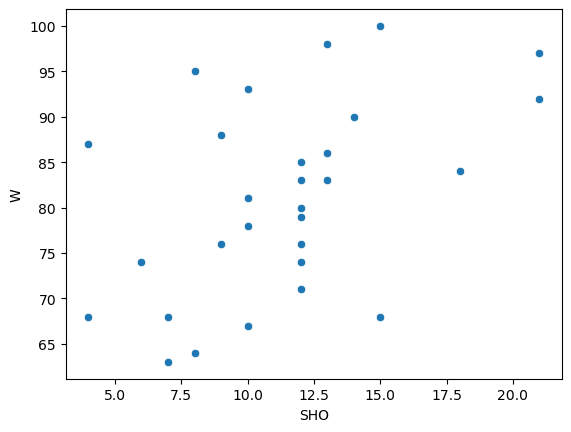

In [25]:
sns.scatterplot(x="SHO",y="W",data=data)

<AxesSubplot:xlabel='SV', ylabel='W'>

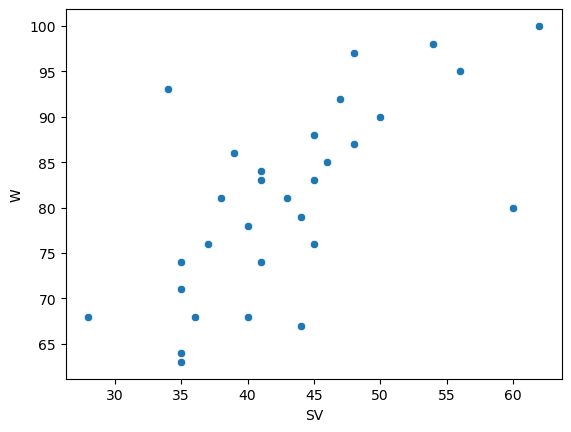

In [26]:
sns.scatterplot(x="SV",y="W",data=data)

<AxesSubplot:xlabel='E', ylabel='W'>

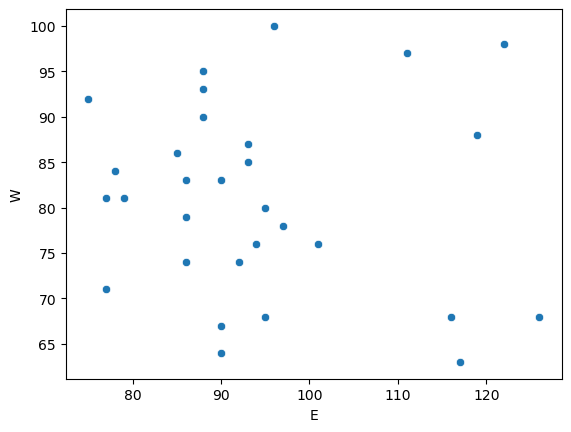

In [27]:
sns.scatterplot(x="E",y="W",data=data)

In [30]:
#finding correlation
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


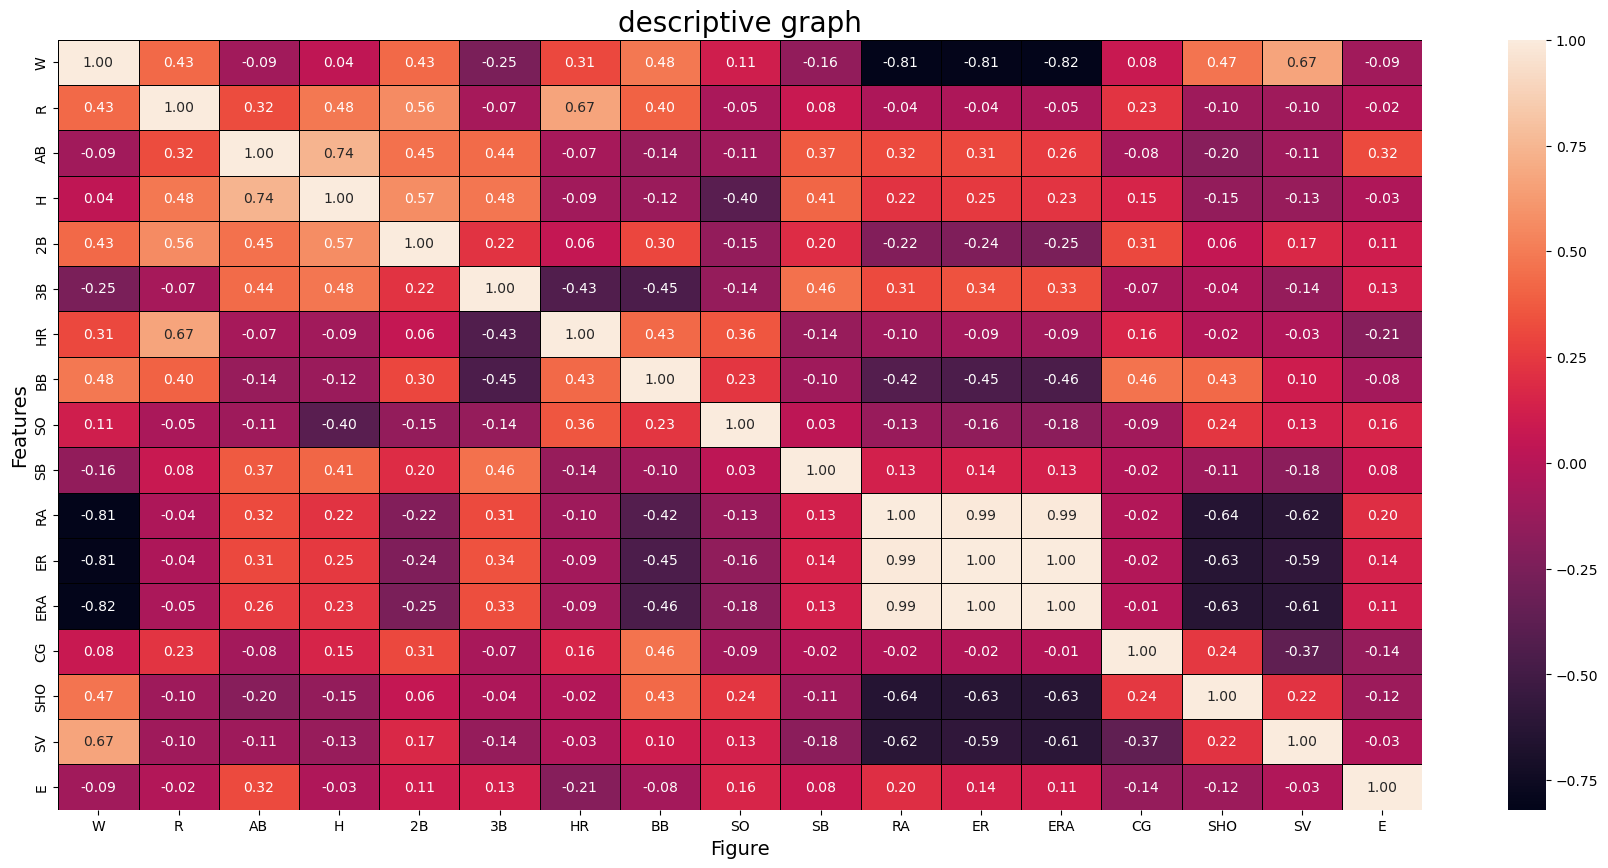

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), annot=True,linewidth=0.5,linecolor="black",fmt="0.2f")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

the heat map shows both positive and negative corelation between the features.High corelation can be seen er and era.

In [35]:
data['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

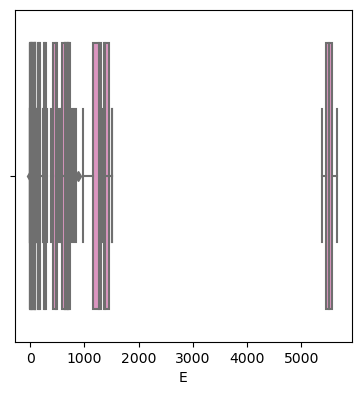

In [46]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(data[i],palette="Set2_r")
        plt.xlabel(i)
p+=1
plt.show()

In [47]:
# checking for skewness
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

threshold is +/-0.5 R,HR,CG,SHO,SV,E has VALUES WHICH DO NOT FALL WITHIN THE THRESHOLD

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

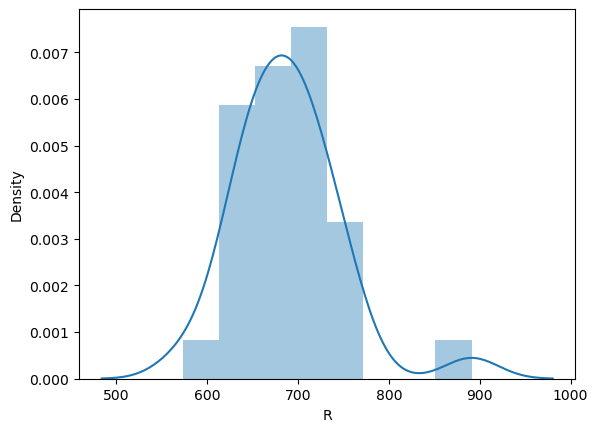

In [50]:
sns.distplot(data["R"])

The data is not normalized. It is bimonial curve

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AB', ylabel='Density'>

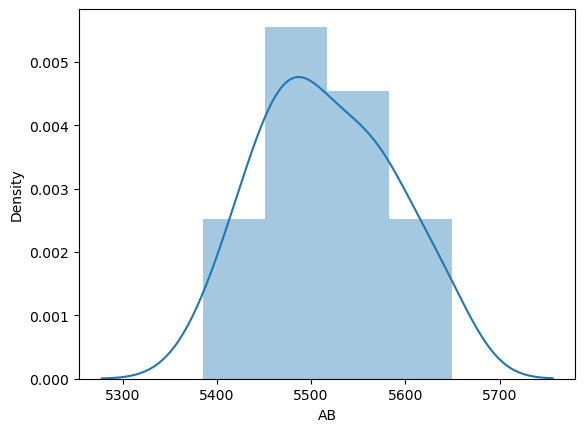

In [51]:
sns.distplot(data["AB"])

Data is within threshold

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HR', ylabel='Density'>

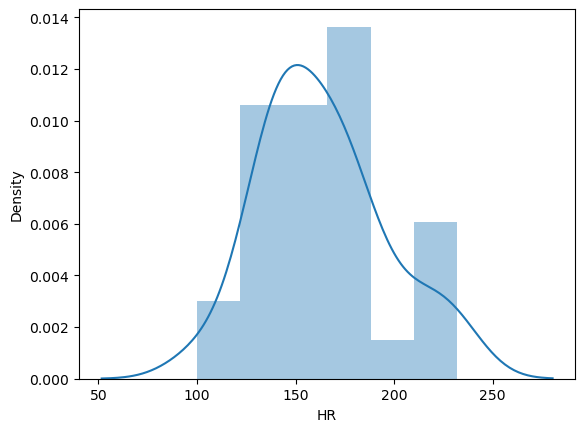

In [55]:
sns.distplot(data["HR"])

Data is within threshold

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

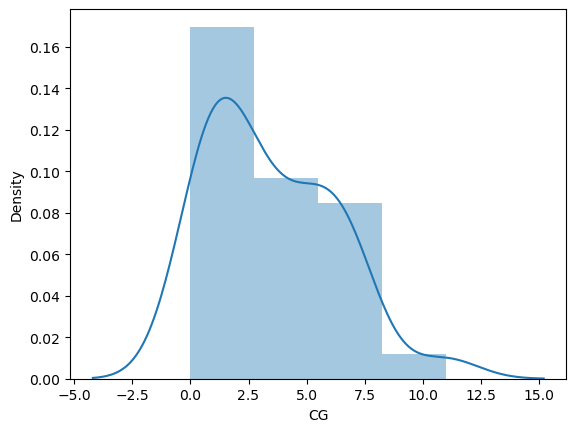

In [54]:
sns.distplot(data["CG"])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

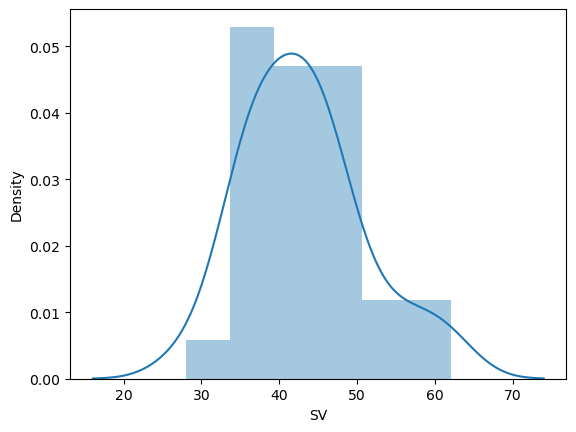

In [56]:
sns.distplot(data["SV"])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='E', ylabel='Density'>

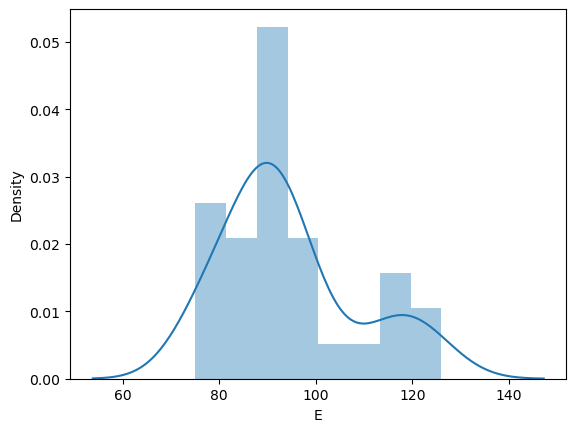

In [57]:
sns.distplot(data["E"])

The data is not normalized. It is bimonial curve

In [15]:
from scipy.stats import zscore
import numpy as np
out_feature=data[['R','HR','CG']]
z=np.abs(zscore(out_feature))
z
#threhold =3
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

In [15]:
z.iloc[5,0]

3.5096470447193067

regrouping the above and z score and creating new data frame data1

In [16]:
data1 = data[(np.abs(zscore(out_feature)) < 3).all(axis=1)]
data1.shape


(29, 17)

In [21]:

print("data loss percentage:-", ((data.shape[0] - data1.shape[0]) / data.shape[0]) * 100)


data loss percentage:- 3.3333333333333335


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['W']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [34]:
from sklearn.linear_model import LinearRegression
# Assuming you have a pandas DataFrame called 'data' with your feature columns
x = data1[['AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]
y = data1['W']

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predict = lr.predict(x_test)
    acc = r2_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Maximum r2 score is", maxAcc, "on random state", maxRS)


Maximum r2 score is 0.8228747049867318 on random state 50


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lr))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lr)))



R2 score:  -4.058931464574518
R2_score on training data:  93.56713915929525
Mean Absoloute Error:- 17.33888318222312
Mean Squared Error:- 511.51418141809023
Root Mean Squared Error:- 22.616679274776175


In [44]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.4604228571428576
R2_score on training data:  92.71589483119212
Mean Absoloute Error:- 5.533333333333331
Mean Squared Error:- 54.557244444444414
Root Mean Squared Error:- 7.3862875955681835


In [47]:
Knn=knn()
Knn.fit(x_train,y_train)
pred_Knn=Knn.predict(x_test)
pred_train=Knn.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.14303296703296686
R2_score on training data:  53.58430435215617
Mean Absoloute Error:- 7.066666666666669
Mean Squared Error:- 86.64888888888892
Root Mean Squared Error:- 9.308538493710435


In [50]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=Knn.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.14303296703296686
R2_score on training data:  99.99999627131018
Mean Absoloute Error:- 7.066666666666669
Mean Squared Error:- 86.64888888888892
Root Mean Squared Error:- 9.308538493710435


In [52]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  0.7466154543769354
R2_score on training data:  89.21027903383909
Mean Absoloute Error:- 4.1301303577801995
Mean Squared Error:- 25.61999294633208
Root Mean Squared Error:- 5.061619597157819


In [54]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.5315918459238884
R2_score on training data:  91.0867445797419
Mean Absoloute Error:- 5.759518046220382
Mean Squared Error:- 47.36126891214017
Root Mean Squared Error:- 6.881952405541626


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: -0.636263736263736


In [61]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  -0.0778011239206553
R2_score on training data:  -1.2140594861403953
Mean Absoloute Error:- 8.382822570338172
Mean Squared Error:- 108.97766919642183
Root Mean Squared Error:- 10.439237002598505


In [68]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.5410849450549453
R2_score on training data:  100.0
Mean Absoloute Error:- 5.103333333333333
Mean Squared Error:- 46.401411111111095
Root Mean Squared Error:- 6.8118581247051155


In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[ 0.30921253 -2.85205207  0.18784836  0.71487707 -2.24509645]
-0.777042109707381
difference between r2 score and cross validation score is - 123.74649668502387


In [73]:

score2=cross_val_score(Knn,x,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[-0.68804545 -2.90684211  0.27223756 -0.1357377   0.60448113]
-0.5707813150287713
difference between r2 score and cross validation score is - 103.12041721716287


In [74]:

score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[-0.32676438 -9.84420341  0.5807737   0.58758046  0.96632462]
-1.6072578008557579
difference between r2 score and cross validation score is - 206.76806579986155


In [75]:

score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

[ 0.36421213 -2.75312783  0.41146157  0.59776308  0.98412825]
-0.07911255923964773
difference between r2 score and cross validation score is - 53.953541638250535


C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.968e+00, tolerance: 2.672e-01
  model = cd_fast.enet_coordinate_descent(


In [76]:

score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[ 0.3092841  -2.68680067  0.33001842  0.69152261 -0.91573444]
-0.45434199683240983
difference between r2 score and cross validation score is - 91.47648539752674


In [77]:

score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[ -2.66477273 -14.26315789   0.74487662  -0.36393443   0.60200472]
-3.188996742119427
difference between r2 score and cross validation score is - 364.9419599262285


In [78]:

score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[-0.14670298 -1.25769049 -0.06355938 -0.64210611 -0.03386398]
-0.4287845873887763
difference between r2 score and cross validation score is - 88.92074445316338


In [79]:

score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[-0.0687875  -5.62391842  0.66742969  0.31948885  0.954773  ]
-0.7502028757244359
difference between r2 score and cross validation score is - 121.06257328672933


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(x_train, y_train)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regress

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [21]:
best_params = gscv.best_params_
print(best_params)



{'alpha': 0.05, 'fit_intercept': False, 'positive': False, 'random_state': 1, 'solver': 'svd'}


In [24]:



from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(x_train, y_train)

# Make predictions on the test data
pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


r2_score: 0.9999999877339205
Mean Absolute Error: 0.0010466586087432006
Mean Squared Error: 1.181632326612236e-06
Root Mean Squared Error: 0.0010870291286861802


In [29]:
import joblib
import pickle
import pandas as pd

# Save the model using joblib
# joblib.dump(model, 'avocado.pkl')

# Save the model using pickle
filename = "baseball.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('baseball.pkl', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(x_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(x_test), 'original': y_test})
print(conclusion)


99.99999877339205
    predicted  original
28  74.000790        74
17  96.998445        97
13  76.000643        76
23  67.001213        67
9   78.001065        78
10  87.998985        88
